# 特徴量の重要度 ~ Permutation Feature Importance ~

In [45]:
import warnings

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

warnings.filterwarnings('ignore')
%matplotlib inline

## シミュレーションデータの生成〜線形モデルの回帰係数の可視化

シミュレーションデータの生成

$$
Y = 0 \times X_0 + 1 \times X_2 + \epsilon , \\
\left(\begin{array}{c}
X_0 \\
X_1 \\
X_2
\end{array}
\right)
= 
\left(
\left(\begin{array}{c}
    0 \\
    0 \\
    0
\end{array}
\right),
\left(\begin{array}{c}
    1 &0 &0 \\
    0 &1 &0 \\
    0 &0 &1
\end{array}
\right)
\right), \\
\epsilon \sim \mathcal{N}(0, 0.01)
$$

- 1行目：目的変数$Y$は特徴量とノイズの線形和で構成される
- 2行目：特徴量の生成過程
    - $\boldsymbol{X} \sim \mathcal{N}(\boldsymbol{\mu}, \boldsymbol{\Sigma})$は，確率変数ベクトル$\boldsymbol{X}$が平均$\boldsymbol{\mu}$(この場合はすべて平均0)，分散共分散行列$\boldsymbol{\Sigma}$(それぞれは分散1で，無相関)

In [35]:
def generate_simulation_data(N, beta, mu, Sigma):
    """
    N : サンプル数
    beta : 各特徴量の傾き
    mu : 多変量正規分布の平均
    Sigma : 多変量正規分布の分散共分散行列
    """
    # 多変量分布からのデータ生成
    X = np.random.multivariate_normal(mu, Sigma, N)
    epsilon = np.random.normal(0, 0.1, N)
    # 特等量とノイズの線形和で目的変数を作成
    y = X @ beta + epsilon
    return train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# シミュレーションデータの生成
N = 1000
J = 3
mu = np.zeros(J)
Sigma = np.array([
    [1,0,0],
    [0,1,0],
    [0,0,1]])
beta = np.array([0,1,2])

X_train, X_test, y_train, y_test = generate_simulation_data(N, beta, mu, Sigma)

In [42]:
def plot_scatter(X, y, var_names):
    J = X.shape[1]
    fig, axes = plt.subplots(nrows=1, ncols=J, figsize=(4*J, 4))
    for d, ax in enumerate(axes):
        ax.scatter(X[:, d], y, alpha=0.3)
        ax.set_xlabel(var_names[d])
        ax.set_ylabel('Y')
        ax.set_xlim(X.min()*1.1, X.max()*1.1)
        ax.grid()
    fig.show()
    plt.tight_layout()

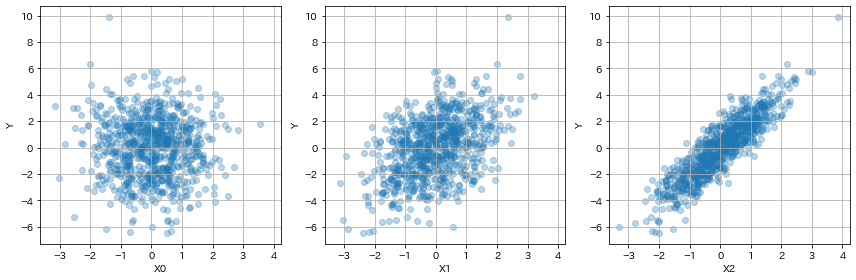

In [43]:
var_names = [f"X{j}" for j in range(J)]
plot_scatter(X_train, y_train, var_names)

線形回帰モデルの特徴量重要度の確認

In [44]:
def plot_bar(variables, values, title=None, xlabel=None, ylabel=None):
    """
    回帰係数の大きさを確認する棒グラフを作成
    """
    fig, ax = plt.subplots()
    ax.barh(variables, values)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xlim(0, None)
    fig.suptitle(title)
    fig.show()

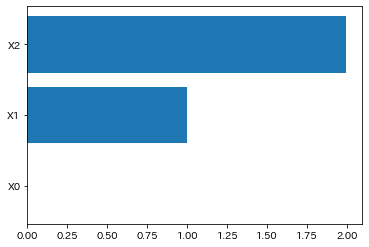

In [46]:
# 学習
model = LinearRegression().fit(X_train, y_train)
# 回帰係数の可視化
plot_bar(var_names, model.coef_,)

## PFI - Permutation 